In [ ]:
#import library
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#read dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/worldometer_coronavirus_daily_data.csv')
df

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
184782,2022-5-10,Zimbabwe,248642.0,106.0,963.0,5481.0,2.0
184783,2022-5-11,Zimbabwe,248778.0,136.0,1039.0,5481.0,0.0
184784,2022-5-12,Zimbabwe,248943.0,165.0,1158.0,5481.0,0.0
184785,2022-5-13,Zimbabwe,249131.0,188.0,1283.0,5482.0,1.0


In [ ]:
#drop kolom
df.drop(['active_cases', 'cumulative_total_cases', 'cumulative_total_deaths'], axis = 1, inplace = True)
display(df)

,date,country,daily_new_cases,daily_new_deaths
0,2020-2-15,Afghanistan,NaN,NaN
1,2020-2-16,Afghanistan,NaN,NaN
2,2020-2-17,Afghanistan,NaN,NaN
3,2020-2-18,Afghanistan,NaN,NaN
4,2020-2-19,Afghanistan,NaN,NaN
...,...,...,...,...
184782,2022-5-10,Zimbabwe,106.0,2.0
184783,2022-5-11,Zimbabwe,136.0,0.0
184784,2022-5-12,Zimbabwe,165.0,0.0
184785,2022-5-13,Zimbabwe,188.0,1.0


In [ ]:
# ambil data 2021
df['date'] = pd.to_datetime(df['date'])
get_data = (df['date'] > '2021-01-01') & (df['date'] <= '2021-12-31')
df.loc[get_data]

df = df.loc[get_data]
display(df)

,date,country,daily_new_cases,daily_new_deaths
322,2021-01-02,Afghanistan,123.0,10.0
323,2021-01-03,Afghanistan,200.0,9.0
324,2021-01-04,Afghanistan,102.0,7.0
325,2021-01-05,Afghanistan,94.0,7.0
326,2021-01-06,Afghanistan,102.0,9.0
...,...,...,...,...
184648,2021-12-27,Zimbabwe,1098.0,17.0
184649,2021-12-28,Zimbabwe,2099.0,32.0
184650,2021-12-29,Zimbabwe,2107.0,27.0
184651,2021-12-30,Zimbabwe,2073.0,30.0


In [ ]:
#ambil data negara
df = df.loc[df['country'].isin(['Poland', 'China', 'Denmark'])]
display(df)

,date,country,daily_new_cases,daily_new_deaths
36426,2021-01-02,China,22.0,0.0
36427,2021-01-03,China,24.0,0.0
36428,2021-01-04,China,33.0,0.0
36429,2021-01-05,China,33.0,0.0
36430,2021-01-06,China,32.0,0.0
...,...,...,...,...
131348,2021-12-27,Poland,5036.0,38.0
131349,2021-12-28,Poland,9839.0,548.0
131350,2021-12-29,Poland,15572.0,793.0
131351,2021-12-30,Poland,14319.0,710.0


In [ ]:
#drop kolom
df.drop(['country'], axis = 1, inplace = True)
df.reset_index(drop = True)

,date,daily_new_cases,daily_new_deaths
0,2021-01-02,22.0,0.0
1,2021-01-03,24.0,0.0
2,2021-01-04,33.0,0.0
3,2021-01-05,33.0,0.0
4,2021-01-06,32.0,0.0
...,...,...,...
1087,2021-12-27,5036.0,38.0
1088,2021-12-28,9839.0,548.0
1089,2021-12-29,15572.0,793.0
1090,2021-12-30,14319.0,710.0


In [ ]:
df.isnull().sum()

date                0
daily_new_cases     0
daily_new_deaths    0
dtype: int64

In [ ]:
df.dropna(subset = ['daily_new_cases'], inplace = True)
df.dropna(subset = ['daily_new_deaths'], inplace = True)
df.isnull().sum()

date                0
daily_new_cases     0
daily_new_deaths    0
dtype: int64

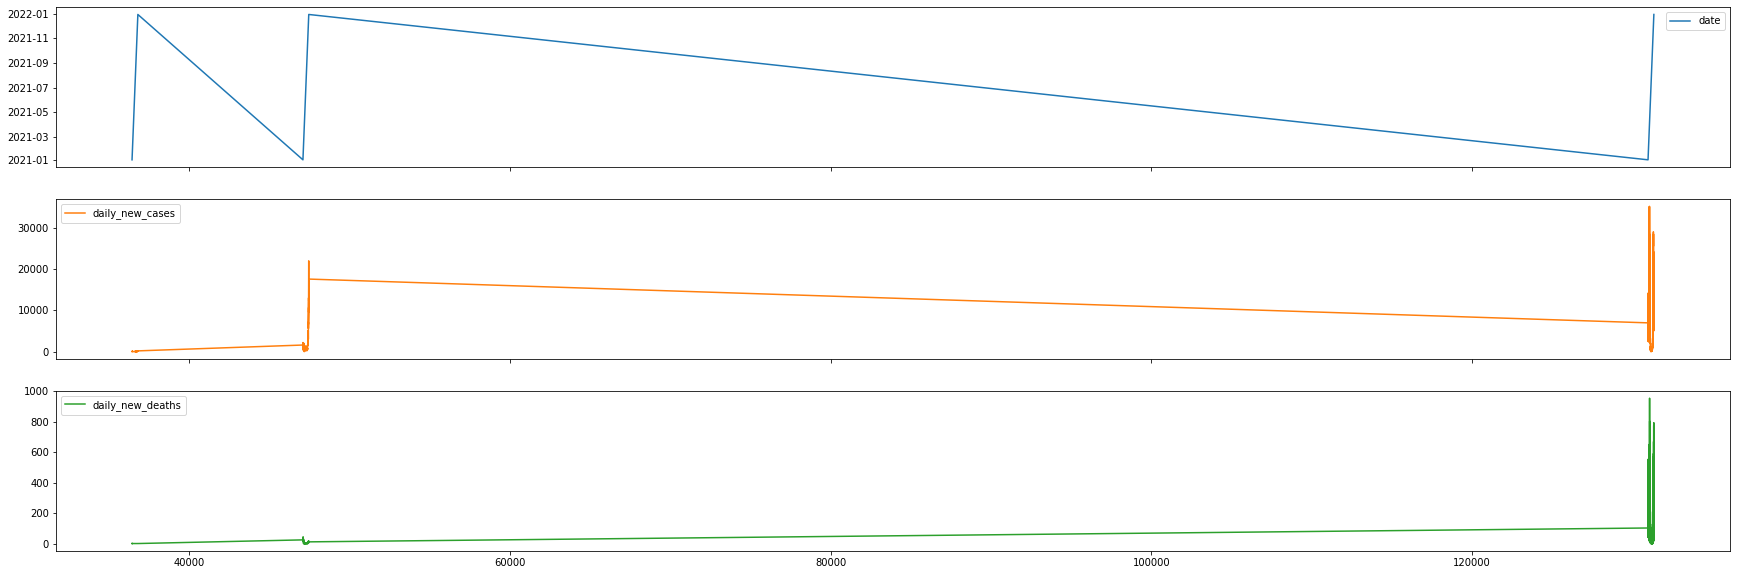

In [ ]:
df_plot = df
df_plot[df_plot.columns.to_list()].plot(subplots = True, figsize = (30, 10))
plt.show()

Text(0.5, 0, 'Datetime')

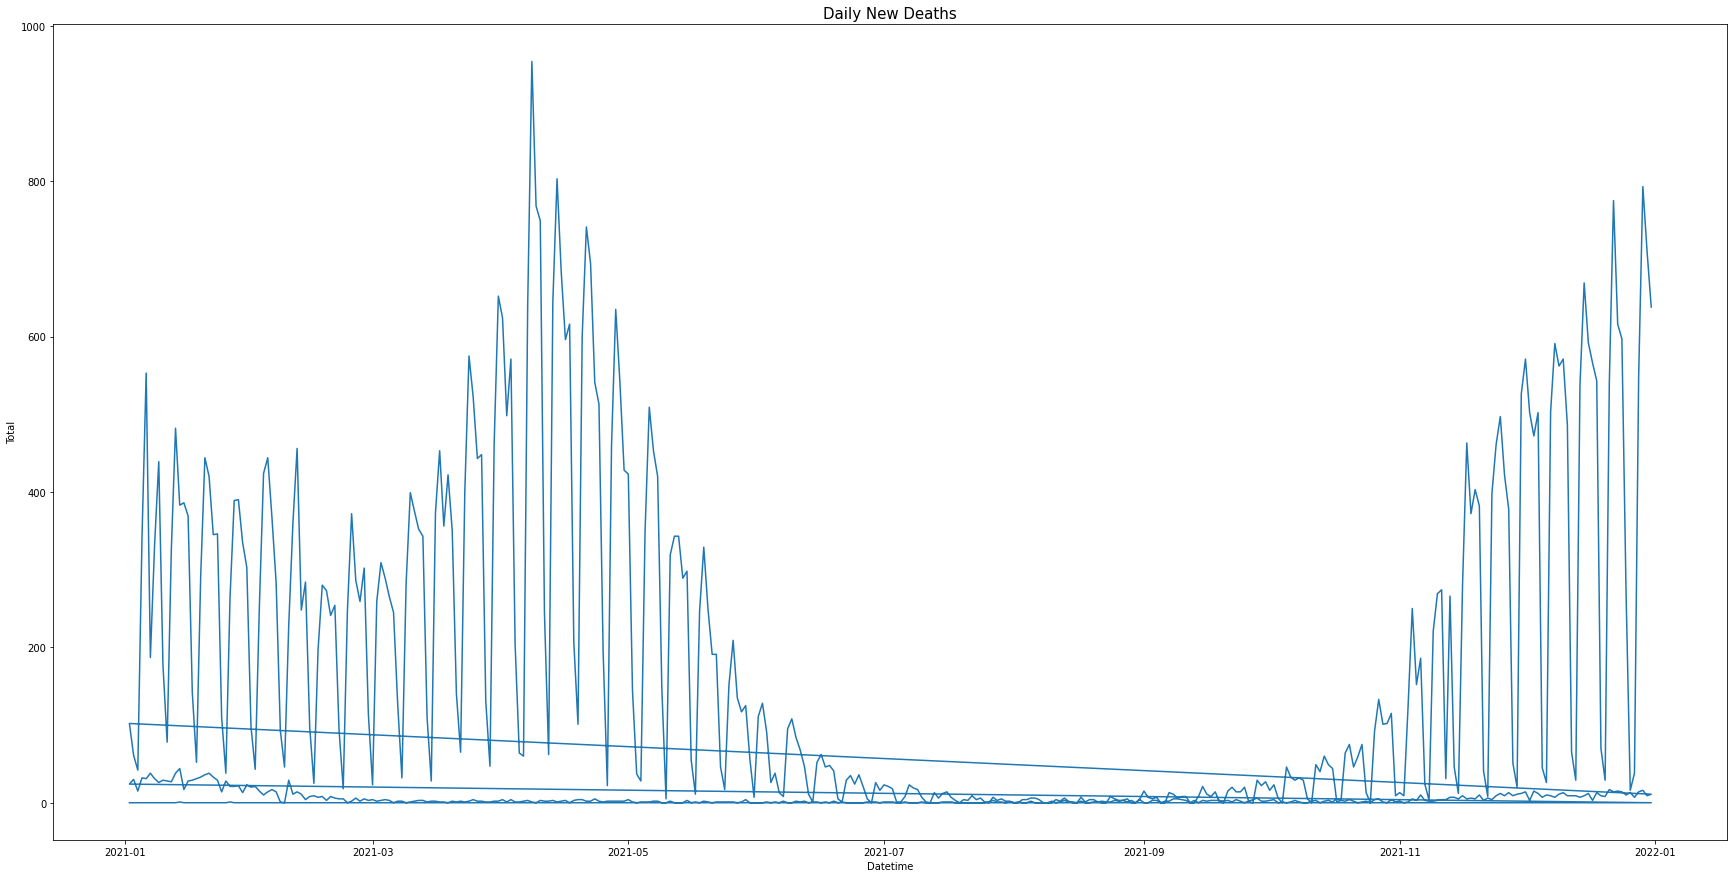

In [ ]:
dates = df['date'].values
temp = df['daily_new_deaths'].values

dates = np.array(dates)
temp = np.array(temp)

plt.figure(figsize = (30, 15))
plt.plot(dates, temp)

plt.title('Daily New Deaths', fontsize = 15)
plt.ylabel('Total')
plt.xlabel('Datetime')

In [ ]:
df.dtypes

date                datetime64[ns]
daily_new_cases            float64
daily_new_deaths           float64
dtype: object

In [ ]:
#split dataset
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(temp, dates, train_size = 0.8, test_size = 0.2, shuffle = False)

print('Jumlah Data Train : ', len(x_train))
print('Jumlah Data Validation : ', len(x_valid))

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis = -1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift = 1, drop_remainder = True)
  ds = ds.flat_map(lambda w : w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w : (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

Jumlah Data Train :  873
Jumlah Data Validation :  219


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Dropout

tf.keras.backend.set_floatx('float64')

train_set = windowed_dataset(x_train, window_size = 64, batch_size = 200, shuffle_buffer = 1000)
val_set = windowed_dataset(x_valid, window_size = 64, batch_size = 200, shuffle_buffer = 1000)

model = Sequential([
    Bidirectional(LSTM(60, return_sequences=True)),
    Bidirectional(LSTM(60)),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1),
])

In [ ]:
max = df['daily_new_deaths'].max()
print('Max value : ' )
print(max)

Max value : 
954.0


In [ ]:
min = df['daily_new_deaths'].min()
print('Min Value : ')
print(min)

Min Value : 
0.0


In [ ]:
#mae
mae = (954.0 - 0.0) * (10 / 100)
print(mae)

95.4


In [ ]:
#callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < 95.4 and logs.get('val_mae') < 95.4):
      print("MAE of the model < 10% of data scale")
      self.model.stop_training = True
callbacks = myCallback()


In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(train_set, epochs=500, validation_data = val_set, callbacks=[callbacks])

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


5/5 [==============================] - 16s 1s/step - loss: 56.9210 - mae: 57.1936 - val_loss: 140.1688 - val_mae: 140.6125
Epoch 2/500
5/5 [==============================] - 4s 799ms/step - loss: 56.9170 - mae: 57.1909 - val_loss: 140.1546 - val_mae: 140.6008
Epoch 3/500
5/5 [==============================] - 4s 802ms/step - loss: 56.9113 - mae: 57.1871 - val_loss: 140.1360 - val_mae: 140.5852
Epoch 4/500
5/5 [==============================] - 4s 798ms/step - loss: 56.9040 - mae: 57.1823 - val_loss: 140.1119 - val_mae: 140.5647
Epoch 5/500
5/5 [==============================] - 4s 802ms/step - loss: 56.8947 - mae: 57.1759 - val_loss: 140.0827 - val_mae: 140.5395
Epoch 6/500
5/5 [==============================] - 6s 1s/step - loss: 56.8818 - mae: 57.1661 - val_loss: 140.0432 - val_mae: 140.5036
Epoch 7/500
5/5 [==============================] - 4s 802ms/step - loss: 56.8647 - mae: 57.1521 - val_loss: 140.0040 - val_mae: 140.4677
Epoch 8/500
5/5 [==============================] - 4s 806m

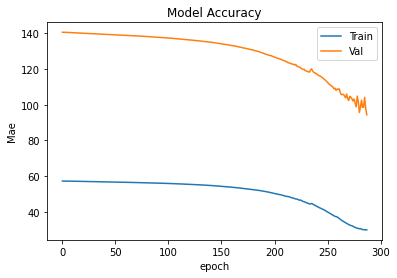

In [ ]:
#plot accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('Mae')
plt.legend(['Train', 'Val'], loc = 'best')
plt.show()

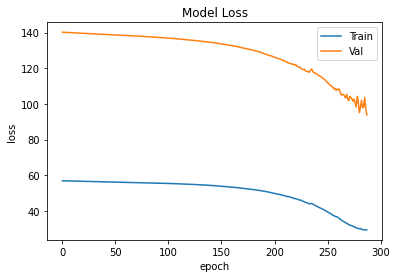

In [ ]:
#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc = 'best')
plt.show()